In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib import font_manager
font_dir = ['/Users/henry/Downloads/GTAmerica Font']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
font_dir = ['/Users/henry/Downloads/GTAmerica Font Bold']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
plt.rcParams['font.family'] = 'GT America'

## Processing Data

In [3]:
def drop_na(df):
    return df.loc[df['POSTAL'].notna()]

def replace_na(df, col):
    return df[col].replace(np.nan, '0')

def to_float(df):
    df['TOTAL EARNINGS'] = df['TOTAL EARNINGS'].str.replace(',','', regex=False)
    df['TOTAL EARNINGS'] = df['TOTAL EARNINGS'].str.replace(' ','', regex=False)
    df['TOTAL EARNINGS'] = df['TOTAL EARNINGS'].str.replace('(','', regex=False)
    df['TOTAL EARNINGS'] = df['TOTAL EARNINGS'].str.replace(')','', regex=False)
    df['TOTAL EARNINGS'] = df['TOTAL EARNINGS'].str.replace('$','', regex=False).astype(float)
    
    df['OVERTIME'] = df['OVERTIME'].str.replace(',','', regex=False)
    df['OVERTIME'] = df['OVERTIME'].str.replace(' ','', regex=False)
    df['OVERTIME'] = df['OVERTIME'].str.replace(')','', regex=False)
    df['OVERTIME'] = df['OVERTIME'].str.replace('(','', regex=False)
    df['OVERTIME'] = df['OVERTIME'].str.replace('$','', regex=False).astype(float)
    return

# 2021
df_2021 = pd.read_csv('2021earnings.csv', encoding = "ISO-8859-1")
df_2021.rename(columns = {'TOTAL_GROSS':'TOTAL EARNINGS'}, inplace = True)
df_2021['TOTAL EARNINGS'] = replace_na(df_2021, 'TOTAL EARNINGS')
df_2021['OVERTIME'] = replace_na(df_2021, 'OVERTIME')
df_2021 = drop_na(df_2021)
to_float(df_2021)

# 2020
df_2020 = pd.read_csv('2020earnings.csv', encoding = "ISO-8859-1")
df_2020['TOTAL EARNINGS'] = replace_na(df_2020, 'TOTAL EARNINGS')
df_2020['OVERTIME'] = replace_na(df_2020, 'OVERTIME')
df_2020 = drop_na(df_2020)
to_float(df_2020)

# 2019
df_2019 = pd.read_csv('2019earnings.csv', encoding = "ISO-8859-1")
df_2019['TOTAL EARNINGS'] = df_2019['TOTAL EARNINGS'].str.replace(' ','')
df_2019['OVERTIME'] = df_2019['OVERTIME'].str.replace(' ','')
df_2019 = df_2019.replace('-', np.nan)
df_2019['TOTAL EARNINGS'] = replace_na(df_2019, 'TOTAL EARNINGS')
df_2019['OVERTIME'] = replace_na(df_2019, 'OVERTIME')
df_2019['POSTAL'] = '0' + df_2019['POSTAL'].astype(str)
df_2019 = drop_na(df_2019)
to_float(df_2019)

# 2018
df_2018 = pd.read_csv('2018earnings.csv', encoding = "ISO-8859-1")
df_2018 = df_2018[~df_2018['TOTAL EARNINGS'].str.contains('TOTAL EARNINGS')]
df_2018['TOTAL EARNINGS'] = replace_na(df_2018, 'TOTAL EARNINGS')
df_2018['OVERTIME'] = replace_na(df_2018, 'OVERTIME')
df_2018 = drop_na(df_2018)
to_float(df_2018)

# 2017
df_2017 = pd.read_csv('2017earnings.csv', encoding = "ISO-8859-1")
df_2017['TOTAL EARNINGS'] = replace_na(df_2017, 'TOTAL EARNINGS')
df_2017['OVERTIME'] = replace_na(df_2017, 'OVERTIME')
df_2017['POSTAL'] = '0' + df_2017['POSTAL'].astype(str)
df_2017 = drop_na(df_2017)
to_float(df_2017)

# 2016
df_2016 = pd.read_csv('2016earnings.csv', encoding = "ISO-8859-1")
df_2016['TOTAL EARNINGS'] = replace_na(df_2016, 'TOTAL EARNINGS')
df_2016['OVERTIME'] = replace_na(df_2016, 'OVERTIME')
df_2016 = drop_na(df_2016)
to_float(df_2016)

## Zip Codes

In [4]:
boston_zip = {'02129', '02128', '02151',
              '02163', '02134', '02135', '02467',
              '02113', '02114', '02203', '02109', '02108', '02110',
              '02215', '02115', '02120', '02119', '02118', '02199', '02116', '02111', '02210', '02127', 
              '02130', '02121', '02125', '02122', '02124', '02126', '02136', '02131', '02132'}

In [5]:
df_2021['POSTAL'] = df_2021['POSTAL'].isin(boston_zip)
df_2020['POSTAL'] = df_2020['POSTAL'].isin(boston_zip)
df_2019['POSTAL'] = df_2019['POSTAL'].isin(boston_zip)
df_2018['POSTAL'] = df_2018['POSTAL'].isin(boston_zip)
df_2017['POSTAL'] = df_2017['POSTAL'].isin(boston_zip)
df_2016['POSTAL'] = df_2016['POSTAL'].isin(boston_zip)

## Boston Police Officers by Residency

In [38]:
inside = [df_2021['POSTAL'].values.sum(),
         df_2020['POSTAL'].values.sum(),
         df_2019['POSTAL'].values.sum(),
         df_2018['POSTAL'].values.sum(),
         df_2017['POSTAL'].values.sum(),
         df_2016['POSTAL'].values.sum()]
outside = [(~df_2021['POSTAL']).values.sum(),
         (~df_2020['POSTAL']).values.sum(),
         (~df_2019['POSTAL']).values.sum(),
         (~df_2018['POSTAL']).values.sum(),
         (~df_2017['POSTAL']).values.sum(),
         (~df_2016['POSTAL']).values.sum()]
years = ['FY' + str(x) for x in range(16,22)]

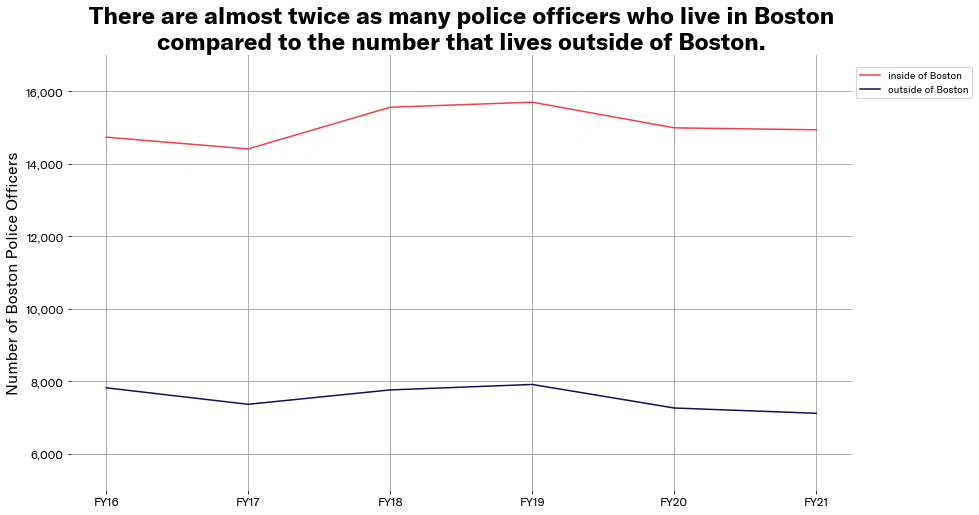

In [65]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax.plot(years, inside, color= '#EF404E', label= 'inside of Boston')
ax.plot(years, outside, color= '#130F54', label= 'outside of Boston')
ax.set_ylim([5000, 17000])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticklabels(['4,000','6,000', '8,000', '10,000', '12,000', '14,000', '16,000'])
plt.grid(linewidth = 1)

plt.title('There are almost twice as many police officers who live in Boston\ncompared to the number that lives outside of Boston.', 
          fontweight="bold", fontsize = 24)
plt.ylabel('Number of Boston Police Officers', fontsize = 16)
leg = ax.legend(loc=(1.005, .9))
fig.savefig('BPO_outvsin', bbox_inches='tight')
plt.show()

In [35]:
inside_prop = [df_2021['POSTAL'].values.sum() / len(df_2021['POSTAL']),
         df_2020['POSTAL'].values.sum() / len(df_2020['POSTAL']),
         df_2019['POSTAL'].values.sum() / len(df_2019['POSTAL']),
         df_2018['POSTAL'].values.sum() / len(df_2018['POSTAL']),
         df_2017['POSTAL'].values.sum() / len(df_2017['POSTAL']),
         df_2016['POSTAL'].values.sum() / len(df_2016['POSTAL'])]
outside_prop = [(~df_2021['POSTAL']).values.sum() / len(df_2021['POSTAL']),
         (~df_2020['POSTAL']).values.sum() / len(df_2020['POSTAL']),
         (~df_2019['POSTAL']).values.sum() / len(df_2019['POSTAL']),
         (~df_2018['POSTAL']).values.sum() / len(df_2018['POSTAL']),
         (~df_2017['POSTAL']).values.sum() / len(df_2017['POSTAL']),
         (~df_2016['POSTAL']).values.sum() / len(df_2016['POSTAL'])]
years = ['FY' + str(x) for x in range(16,22)]

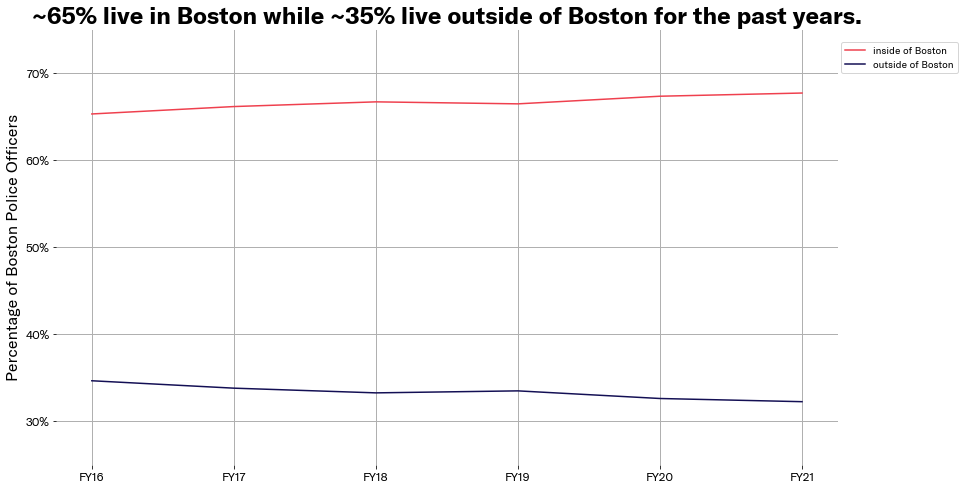

In [66]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax.plot(years, inside_prop, color= '#EF404E', label= 'inside of Boston')
ax.plot(years, outside_prop, color= '#130F54', label= 'outside of Boston')
ax.set_ylim([.25, .75])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticklabels(['25%','30%', '40%', '50%', '60%', '70%'])
plt.grid(linewidth = 1)

plt.title('~65% live in Boston while ~35% live outside of Boston for the past years.', 
          fontweight="bold", fontsize = 24)
plt.ylabel('Percentage of Boston Police Officers', fontsize = 16)
leg = ax.legend(loc=(1.005, .9))
fig.savefig('BPO_outvsin_prop', bbox_inches='tight')
plt.show()

## Boston Police Officers Average Employee Compensation by Residency

In [24]:
inside_earnings = [df_2021[df_2021['POSTAL']]['TOTAL EARNINGS'].mean(),
         df_2020[df_2020['POSTAL']]['TOTAL EARNINGS'].mean(),
         df_2019[df_2019['POSTAL']]['TOTAL EARNINGS'].mean(),
         df_2018[df_2018['POSTAL']]['TOTAL EARNINGS'].mean(),
         df_2017[df_2017['POSTAL']]['TOTAL EARNINGS'].mean(),
         df_2016[df_2016['POSTAL']]['TOTAL EARNINGS'].mean()]
outside_earnings = [df_2021[~df_2021['POSTAL']]['TOTAL EARNINGS'].mean(),
         df_2020[~df_2020['POSTAL']]['TOTAL EARNINGS'].mean(),
         df_2019[~df_2019['POSTAL']]['TOTAL EARNINGS'].mean(),
         df_2018[~df_2018['POSTAL']]['TOTAL EARNINGS'].mean(),
         df_2017[~df_2017['POSTAL']]['TOTAL EARNINGS'].mean(),
         df_2016[~df_2016['POSTAL']]['TOTAL EARNINGS'].mean()]
years = ['FY' + str(x) for x in range(16,22)]

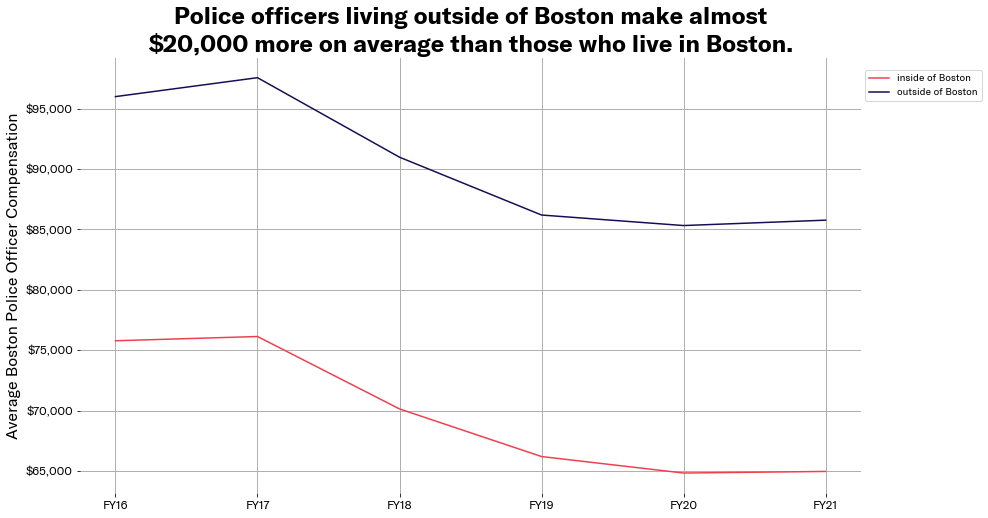

In [67]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)

plt.yticks(np.arange(65000, 100000, 5000), fontsize = 12)
plt.xticks(fontsize = 12)

ax.plot(years, inside_earnings, color= '#EF404E', label= 'inside of Boston')
ax.plot(years, outside_earnings, color= '#130F54', label= 'outside of Boston')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticklabels(['$65,000', '$70,000', '$75,000', '$80,000', '$85,000', '$90,000', '$95,000'])
plt.grid(linewidth = 1)

plt.title('Police officers living outside of Boston make almost\n$20,000 more on average than those who live in Boston.', 
          fontweight="bold", fontsize = 24)
plt.ylabel('Average Boston Police Officer Compensation', fontsize = 16)
leg = ax.legend(loc=(1.005, .9))
fig.savefig('BPO_outvsin_earnings', bbox_inches='tight')
plt.show()

## Boston Police Officers Average Overtime Compensation by Residency

In [57]:
inside_ot = [df_2021[df_2021['POSTAL']]['OVERTIME'].mean(),
         df_2020[df_2020['POSTAL']]['OVERTIME'].mean(),
         df_2019[df_2019['POSTAL']]['OVERTIME'].mean(),
         df_2018[df_2018['POSTAL']]['OVERTIME'].mean(),
         df_2017[df_2017['POSTAL']]['OVERTIME'].mean(),
         df_2016[df_2016['POSTAL']]['OVERTIME'].mean()]
outside_ot = [df_2021[~df_2021['POSTAL']]['OVERTIME'].mean(),
         df_2020[~df_2020['POSTAL']]['OVERTIME'].mean(),
         df_2019[~df_2019['POSTAL']]['OVERTIME'].mean(),
         df_2018[~df_2018['POSTAL']]['OVERTIME'].mean(),
         df_2017[~df_2017['POSTAL']]['OVERTIME'].mean(),
         df_2016[~df_2016['POSTAL']]['OVERTIME'].mean()]
years = ['FY' + str(x) for x in range(16,22)]

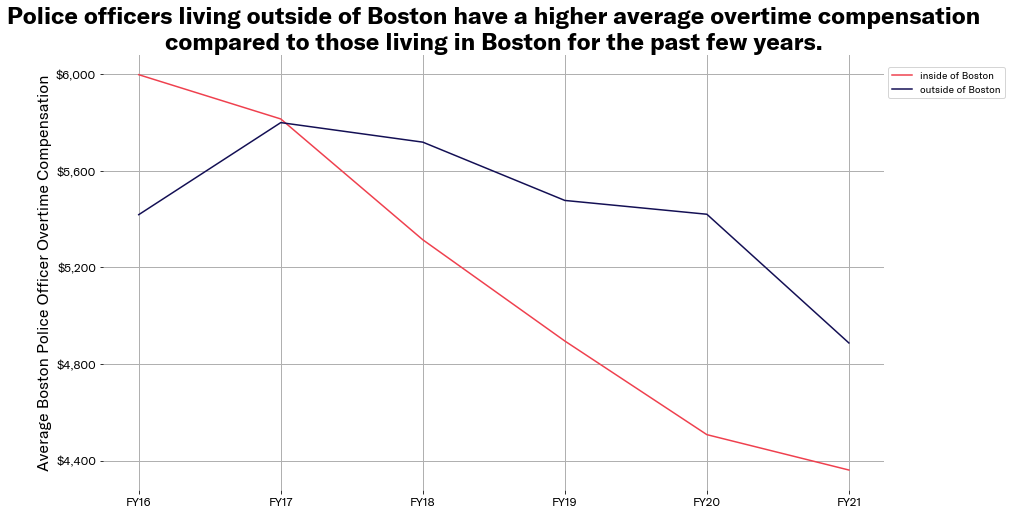

In [68]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)

plt.yticks(np.arange(4000, 6400, 400), fontsize = 12)
plt.xticks(fontsize = 12)

ax.plot(years, inside_ot, color= '#EF404E', label= 'inside of Boston')
ax.plot(years, outside_ot, color= '#130F54', label= 'outside of Boston')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticklabels(['$4,000', '$4,400', '$4,800', '$5,200', '$5,600', '$6,000', '$6,400'])
plt.grid(linewidth = 1)

plt.title('Police officers living outside of Boston have a higher average overtime compensation\ncompared to those living in Boston for the past few years.', 
          fontweight="bold", fontsize = 24)
plt.ylabel('Average Boston Police Officer Overtime Compensation', fontsize = 16)
leg = ax.legend(loc=(1.005, .9))
fig.savefig('BPO_outvsin_ot', bbox_inches='tight')
plt.show()